<a href="https://colab.research.google.com/github/infiniteDipia/CNN/blob/main/LeNet-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test) =keras.datasets.cifar10.load_data()
x_train,x_test=x_train.astype('float32')/255.0,x_test.astype('float32')/255.0
num_classes=10
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2,)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation="softmax"))






In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)

Epoch 1/50
704/704 - 12s - 17ms/step - accuracy: 0.4306 - loss: 1.5567 - val_accuracy: 0.5810 - val_loss: 1.1856
Epoch 2/50
704/704 - 4s - 6ms/step - accuracy: 0.5875 - loss: 1.1531 - val_accuracy: 0.6802 - val_loss: 0.9333
Epoch 3/50
704/704 - 4s - 6ms/step - accuracy: 0.6549 - loss: 0.9756 - val_accuracy: 0.7128 - val_loss: 0.8164
Epoch 4/50
704/704 - 4s - 6ms/step - accuracy: 0.6923 - loss: 0.8739 - val_accuracy: 0.7402 - val_loss: 0.7397
Epoch 5/50
704/704 - 4s - 6ms/step - accuracy: 0.7214 - loss: 0.7911 - val_accuracy: 0.7512 - val_loss: 0.7167
Epoch 6/50
704/704 - 4s - 6ms/step - accuracy: 0.7406 - loss: 0.7368 - val_accuracy: 0.7636 - val_loss: 0.6855
Epoch 7/50
704/704 - 4s - 6ms/step - accuracy: 0.7576 - loss: 0.6897 - val_accuracy: 0.7642 - val_loss: 0.6821
Epoch 8/50
704/704 - 4s - 6ms/step - accuracy: 0.7703 - loss: 0.6572 - val_accuracy: 0.7894 - val_loss: 0.6210
Epoch 9/50
704/704 - 5s - 7ms/step - accuracy: 0.7816 - loss: 0.6211 - val_accuracy: 0.7924 - val_loss: 0.6235

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.7928 - loss: 0.7077
Test accuracy: 0.7928000092506409


In [ ]:
predictions = model.predict(x_test[:5])
print("예측 결과:", np.argmax(predictions, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
예측 결과: [3 8 8 0 6]


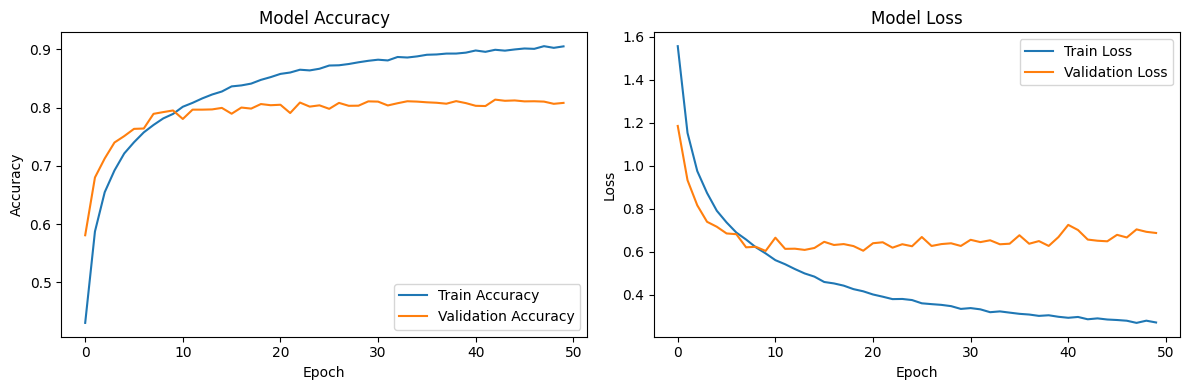

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(history.history['accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(loc='lower right')

axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()